### The Case of the Sloppy Scribe:
### Classical Measurement Error
**Kenneth Flamm**

*October 2019*

> Let's start with our eco apple survey data set

In [1]:
import sys                         # import operating system functions
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd                    # data package, redundant since already did
import matplotlib.pyplot as plt               # graphics package, just the part we mainly use
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use if date is a field in your data

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
# print ('Matplotlib version:',matplotlib.__version__) #command not in the pyplot piece of matplotlib, would need to import entire package
print('Today: ', dt.date.today())

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version:  1.0.1
Today:  2020-04-08


In [2]:
#use apple.data
apdf=pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/apple.dta')
apdf.tail()

,id,educ,date,state,regprc,ecoprc,inseason,hhsize,male,faminc,age,reglbs,ecolbs,numlt5,num5_17,num18_64,numgt64
655,13892,14,20298,MD,0.59,0.59,0,5,0,65,37,1.333333,1.333333,1,2,2,0
656,13893,16,20398,OH,0.59,0.59,0,4,0,65,47,0.000000,2.000000,0,2,2,0
657,13908,16,20398,IN,0.89,1.09,0,2,0,75,51,1.000000,0.000000,0,0,2,0
658,13916,12,20298,NY,0.59,0.59,0,1,0,15,45,0.000000,2.666667,0,0,1,0
659,13921,18,20798,MA,1.19,1.39,0,3,1,25,24,2.000000,0.000000,0,0,3,0


### The Case of the Sloppy Scribe

* Suppose the person recording the data erroneously and randomly added a pound of eco apples to eco apple consumption half the time, creating measurement error in the dependent variable. This will inflate the expected quantity of apples purchased by (on average) .5 lbs, an increase that is independent of all explanatory variables.

* Suppose the same person also randomly added or subtracted .50 from the eco apple price, creating a measurement error in the explanatory eco apple price data. This measurement error will create a correlation between the observed, noisy, explanatory variable and components of the disturbance term in the regression model. (See Wooldridge, chapter 9.) Explanatory variables that are correlated with unobservable factors in the disturbance term of the regression model are called ***endogeneous*** variables.

* What are the effects of these two kinds of errors on the estimated coefficient of eco apple price?

In [3]:
# baseline model:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
mod=smf.ols('ecolbs ~ ecoprc + regprc ',apdf).fit()
b_baseline=mod.params[1]
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ecolbs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     12.41
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           5.11e-06
Time:                        14:55:44   Log-Likelihood:                -1535.3
No. Observations:                 660   AIC:                             3077.
Df Residuals:                     657   BIC:                             3090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9653      0.380      5.171      0.000       1.219       2.712
ecoprc        -2.9265      0.588     -4.978      0.000      -4.081      -1.772
regprc         3.0289      0.711      4.261      0.000       1.633       4.425
==============================================================================
Omnibus:                      991.053   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354819.834
Skew:                           8.309   Prob(JB):                         0.00
Kurtosis:                     115.367   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now, let's turn our error-prone scribe loose, adding noise to our data:

#### First, measurement error in y

#### Create a large number of simulated random samples
##### Scenario: 1 pound plus-up added to eco apples demand measurement with probability 1/2, no change to original data with probability 1/2
##### This means average apple consump in each sample increases by about .5 lbs.

In [4]:
print(apdf.ecolbs.describe())
np.random.seed(4718952)
nsmpl=400 # number of random samples in simulation studies
# change above number to change number of random sample replications
# now, noisy ecolbs measurement
y_err=np.random.randint(0,2,(len(apdf.ecoprc),nsmpl))
print(y_err.shape)
print(apdf.shape)
print(y_err[:,1])

y_err[:,3].mean()

count    660.00000
mean       1.47399
std        2.52578
min        0.00000
25%        0.00000
50%        1.00000
75%        2.00000
max       42.00000
Name: ecolbs, dtype: float64
(660, 400)
(660, 17)
[0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0

0.5348484848484848

#### Now reestimate model with noisy dependent variable

In [5]:
# loop thru construction of simulated dataframe, estimation of parameters
betap=[]
for i in range(0,nsmpl):
    dfi=pd.concat([pd.DataFrame({'yerr':y_err[:,i]}),apdf],axis=1)
    dfi.loc[:,'ysim']=dfi.ecolbs+dfi.yerr
    mod_yerr=smf.ols('ysim ~ ecoprc+regprc',dfi).fit()
    betap.append(mod_yerr.params[1])
print('mean of estimated ecoprc coefficient with ',nsmpl,'reps simulated dependent variable measurement errors = ',np.mean(betap))

mean of estimated ecoprc coefficient with  400 reps simulated dependent variable measurement errors =  -2.9222431198637344


#### Price coefficient is still consistent and unbiased!
Let's make our simulated price coefficients into a dataframe.

In [6]:
bdf=pd.DataFrame({'b':betap})
print(bdf.describe())

                b
count  400.000000
mean    -2.922243
std      0.117888
min     -3.272720
25%     -3.005334
50%     -2.925958
75%     -2.836077
max     -2.499820


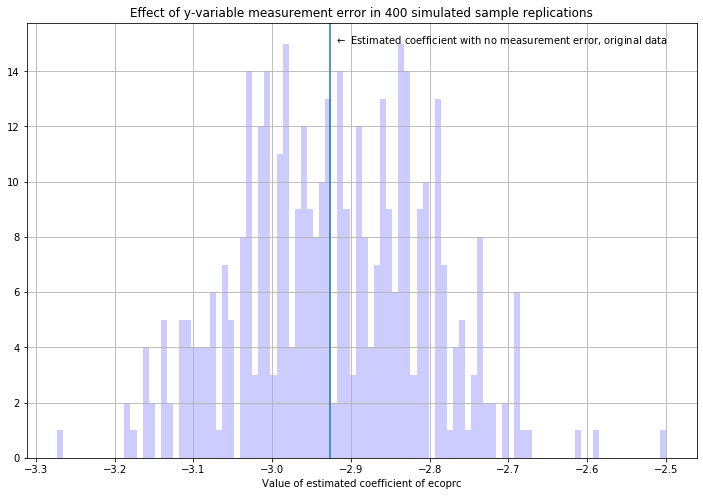

In [7]:
fig,ax=plt.subplots(figsize=(12,8))

ax.set_title('Effect of y-variable measurement error in ' + str(nsmpl)+' simulated sample replications')
ax.set_xlabel('Value of estimated coefficient of ecoprc')
ax.hist(bdf.b,bins=100,alpha=.2,color='b')
ax.axvline(x=b_baseline)
ax.grid()
ax.annotate('$\leftarrow$ Estimated coefficient with no measurement error, original data',xy=(-2.92,15));

##### If we increased number of sim replications, what do you think would happen to this distribution picture?

#### Summary of what we see

* y measurement error: 
    * simulated measurement error had mean .5
    * on intercept, would expect to be up by about .5
        * since on average, measured apple consumption up by .5, independent of explanatory variables
    * other coefficients a little larger or smaller, but close to original values
    * plotted distribution of estimated coeff on ecoprc illustrates this
    
    
* y measurement error has no impact on bias of coefficients, changes only intercept by about expected value of measurement error
    * if measurement error had mean zero, would have no effect on constant either, on average
    * increases sampling error (impact shown above)
    * increases standard errors (not shown) due to noisier data, reduces $R^2$
    * No worries, regression results are still unbiased and consistent

### Now reestimate with noisy explanatory variable-- eco apple price

Same strategy, replicate simulated price with noise added on for nsmpl reps

Will make mean (expected value) of error zero by subtracting off .5



In [8]:
print(apdf.ecoprc.describe())
x_err=np.random.randint(0,2,(len(apdf.ecoprc),nsmpl))-.5
print(x_err.shape)
print(apdf.shape)
print(np.mean(x_err))

count    660.000000
mean       1.081517
std        0.295573
min        0.590000
25%        0.890000
50%        1.090000
75%        1.290000
max        1.590000
Name: ecoprc, dtype: float64
(660, 400)
(660, 17)
-0.0009090909090909091


In [11]:
# loop thru construction of simulated dataframe, estimation of parameters
betap=[]
for i in range(0,nsmpl):
    dfi=pd.concat([pd.DataFrame({'xerr':x_err[:,i]}),apdf],axis=1)
    dfi.loc[:,'e_x']=dfi.ecoprc+dfi.xerr
    mod_xerr=smf.ols('ecolbs ~ e_x+regprc',dfi).fit()
    betap.append(mod_xerr.params[1])
print('mean of estimated ecoprc coefficient with ',nsmpl,' simulated explanatory variable measurement error samples = ',np.mean(betap))

mean of estimated ecoprc coefficient with  400  simulated explanatory variable measurement error samples =  -0.27715722093276396


In [12]:
bdf=pd.DataFrame({'b':betap})
print(bdf.describe())

                b
count  400.000000
mean    -0.277157
std      0.187357
min     -0.793443
25%     -0.405826
50%     -0.277834
75%     -0.147746
max      0.414711


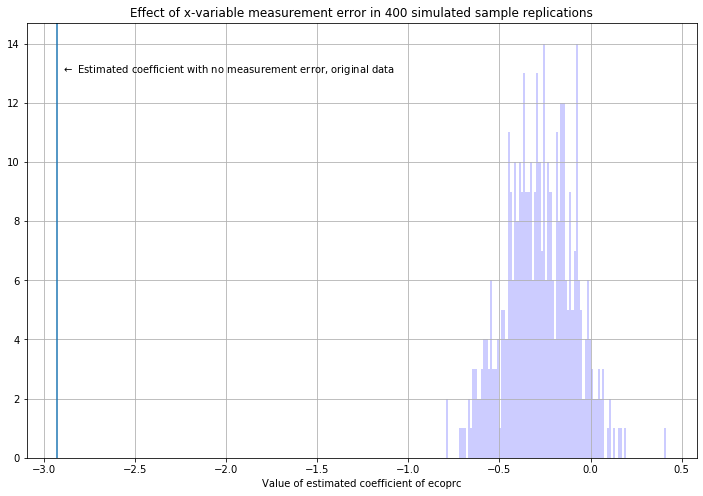

In [13]:

fig,ax=plt.subplots(figsize=(12,8))
ax.set_title('Effect of x-variable measurement error in ' + str(nsmpl)+' simulated sample replications')
ax.set_xlabel('Value of estimated coefficient of ecoprc')
ax.hist(bdf.b,bins=100,alpha=.2,color='b')
ax.axvline(x=b_baseline)
ax.grid()
ax.annotate('$\leftarrow$ Estimated coefficient with no measurement error, original data',xy=(-2.9,13));

### Wow, huge impact on bias! Can even reverse sign of estimated coefficient...

* x measurement error:
    * biases coefficient of x, huge impact 
    * generally, also biases estimates of all other measured coefficients

* Moral of this story:
    * Measurement error in *y* has no impact on bias of coefficients; just raises expected value of intercept by expected value of error
        * increases estimated standard errors and lowers $R^2$
    * Measurement error in *x* biases coefficients
        * in case of a single explanatory variable, biases coefficient toward zero
        * in case of multiple explanatory variables, biases coefficients but more complicated to determine size and direction of bias

##### Solutions?

* This is an example of *endogeneity*: measured x variable correlated with disturbance term (which contains term dependent on measurement error)
    * In simple, one explanatory variable case, magnitude of bias depends on variation in measurement error relative to variation in true, unobserved variable
    * bias is small if variance of measurement error small relative to variance of correctly measured variable
* One solution:
    * Find another variable correlated with true (unobserved) value of variable but unrelated (directly) to y
    * Use this other variable to *instrument* the x variable measured with error (we will return to this shortly)
    